In [1]:
import pandas as pd
import os
cur_dir = os.getcwd()

In [2]:
raw_data = pd.read_csv(f'{cur_dir}\\data\\raw_data.csv')
raw_data.set_index(['composition','trial','time'],drop=True,inplace=True)

smooth_data = pd.read_csv(f'{cur_dir}\\data\\smooth_data.csv')
smooth_data.set_index(['composition','trial','time'],drop=True,inplace=True)

kinetic_data = pd.read_csv(f'{cur_dir}\\data\\kinetic_data.csv')
kinetic_data.set_index(['composition', 'time'],drop=True,inplace=True)

In [3]:
from data_processing.subtract_one_day import subtract_one_day
raw_data_adjusted = subtract_one_day(raw_data)

In [4]:
from data_processing.calculate_slopes import calculate_slopes
raw_data_slopes = calculate_slopes(raw_data_adjusted)
raw_data_slopes.to_csv(f'{cur_dir}\\data\\raw_data_slopes.csv')

smooth_data_slopes = calculate_slopes(smooth_data)
smooth_data_slopes.to_csv(f'{cur_dir}\\data\\smooth_data_slopes.csv')

kinetic_data_slopes = calculate_slopes(kinetic_data)
kinetic_data_slopes.to_csv(f'{cur_dir}\\data\\kinetic_data_slopes.csv')

In [5]:
display(raw_data_slopes.head(2))
display(smooth_data_slopes.head(2))
display(kinetic_data_slopes.head(2))

trial  time  acetate  biomass  butanol  butyrate  ethanol   Δ acetate  \
1      1  0.58    21.61     0.41     0.04      0.06    10.94  324.285714   
1      1  0.65    44.31     0.39     0.05      0.08    15.89    5.081081   

   Δ biomass  Δ butanol  Δ butyrate  Δ ethanol   CO    CO2     H2  Flow Rate  
1  -0.285714   0.142857    0.285714  70.714286  0.5  0.375  0.125          1  
1   0.189189   0.432432    1.513514 -20.945946  0.5  0.375  0.125          1

trial  time    acetate   biomass   butanol  butyrate    ethanol  Δ acetate  \
1      1   0.0  16.905029  0.429546  0.029818  0.075529  15.895240  10.961665   
1      1   0.1  18.001195  0.421076  0.028260  0.061033  15.607023  18.298778   

   Δ biomass  Δ butanol  Δ butyrate  Δ ethanol   CO    CO2     H2  Flow Rate  
1  -0.084697  -0.015584   -0.144950  -2.882172  0.5  0.375  0.125          1  
1  -0.102733   0.000561   -0.100208  -4.628878  0.5  0.375  0.125          1

trial  time    acetate   biomass   butanol  butyrate    ethanol  Δ acetate  \
1      0   0.0  15.992719  0.409529  0.105137  0.068777  16.239544  19.353866   
1      0   0.1  17.928105  0.464472  0.105137  0.068777  16.239544  21.794745   

   Δ biomass  Δ butanol  Δ butyrate  Δ ethanol   CO    CO2     H2  Flow Rate  
1   0.549437        0.0         0.0        0.0  0.5  0.375  0.125          1  
1   0.618731        0.0         0.0        0.0  0.5  0.375  0.125          1

In [6]:
from ml_slope_model.get_ml_slope_prediction_dict import get_ml_slope_prediction_dict

slope_ml_dict_from_raw_rf = get_ml_slope_prediction_dict(raw_data_slopes, smooth_data_slopes, 'random forest')
slope_ml_dict_from_raw_gb = get_ml_slope_prediction_dict(raw_data_slopes, smooth_data_slopes, 'gradient boosting')

slope_ml_dict_from_smooth_rf = get_ml_slope_prediction_dict(smooth_data_slopes, smooth_data_slopes, 'random forest')
slope_ml_dict_from_smooth_gb = get_ml_slope_prediction_dict(smooth_data_slopes, smooth_data_slopes, 'gradient boosting')

slope_ml_dict_from_kinetic_rf = get_ml_slope_prediction_dict(kinetic_data_slopes, smooth_data_slopes, 'random forest')
slope_ml_dict_from_kinetic_gb = get_ml_slope_prediction_dict(kinetic_data_slopes, smooth_data_slopes, 'gradient boosting')

In [7]:
slope_ml_dict_from_smooth_gb['composition_1']

73e-02,
         3.54085973e+00,  2.36882353e+00,  4.76845249e+00, -5.49831674e+00,
         5.78190045e-02,  3.61876923e+00,  1.86590950e+00,  4.98001810e+00,
        -5.44174661e+00,  5.06696833e-02,  3.70232579e+00,  1.31404525e+00,
         5.21343891e+00, -5.38438914e+00,  4.31131222e-02,  3.78966516e+00,
         7.43963801e-01,  5.45294118e+00, -5.32768326e+00,  3.56018100e-02,
         3.87553846e+00,  1.89782805e-01,  5.68613575e+00, -5.27715837e+00,
         2.85882353e-02,  3.95131222e+00, -3.10995475e-01,  5.89792760e+00,
        -5.23354751e+00,  2.18190045e-02,  4.01582805e+00, -7.27638009e-01,
         6.07463348e+00, -5.20438009e+00,  1.91312217e-02,  4.06113122e+00,
        -1.02393665e+00,  6.19986425e+00, -5.18971041e+00,  1.75927602e-02,
         4.08406335e+00, -1.16847964e+00,  6.25923077e+00, -4.35718552e+00,
         1.83619910e-02,  3.84446154e+00, -6.92470588e-01,  5.79210860e+00,
        -4.61353846e+00,  2.33031674e-02,  4.04940271e+00, -4.15294118e-01,
    

In [8]:
from plotting.plot_ml_predictions import plot_ml_predictions
plot_ml_predictions(
    slope_ml_dict_from_raw_rf,
    'slope',
    'ML Slope Predictions with Raw Data Trained with Random Forest'
)

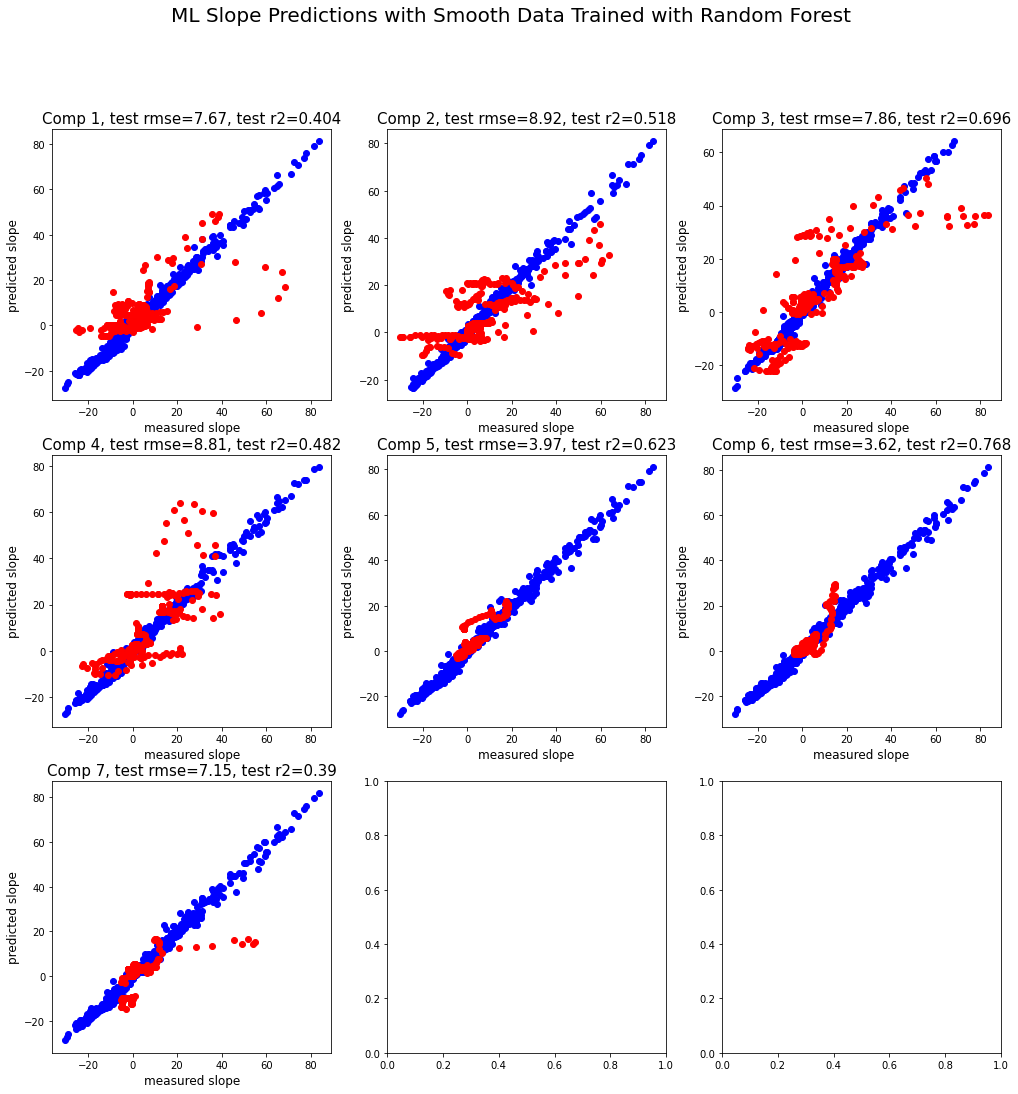

In [9]:
plot_ml_predictions(
    slope_ml_dict_from_smooth_rf,
    'slope',
    'ML Slope Predictions with Smooth Data Trained with Random Forest'
)

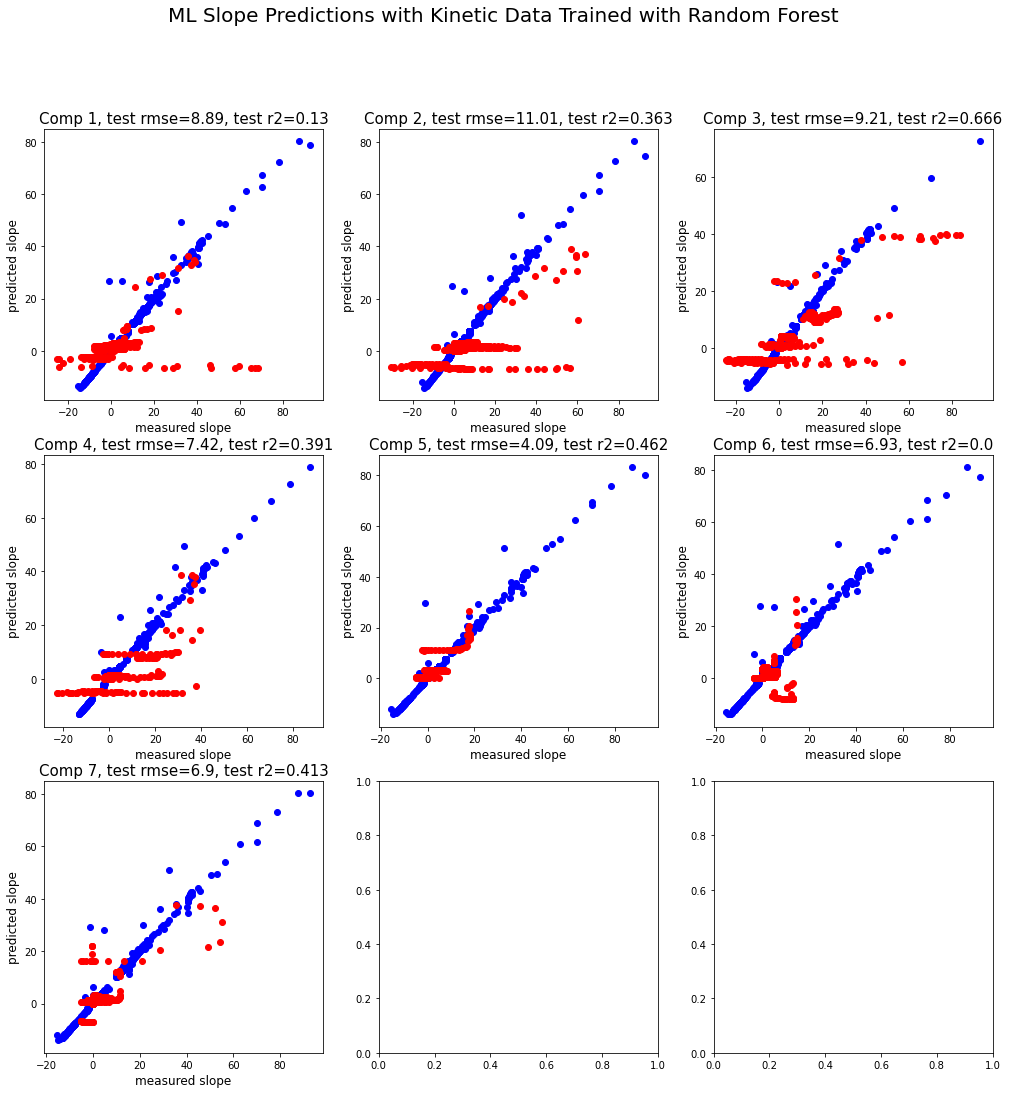

In [10]:
plot_ml_predictions(
    slope_ml_dict_from_kinetic_rf,
    'slope',
    'ML Slope Predictions with Kinetic Data Trained with Random Forest'
)

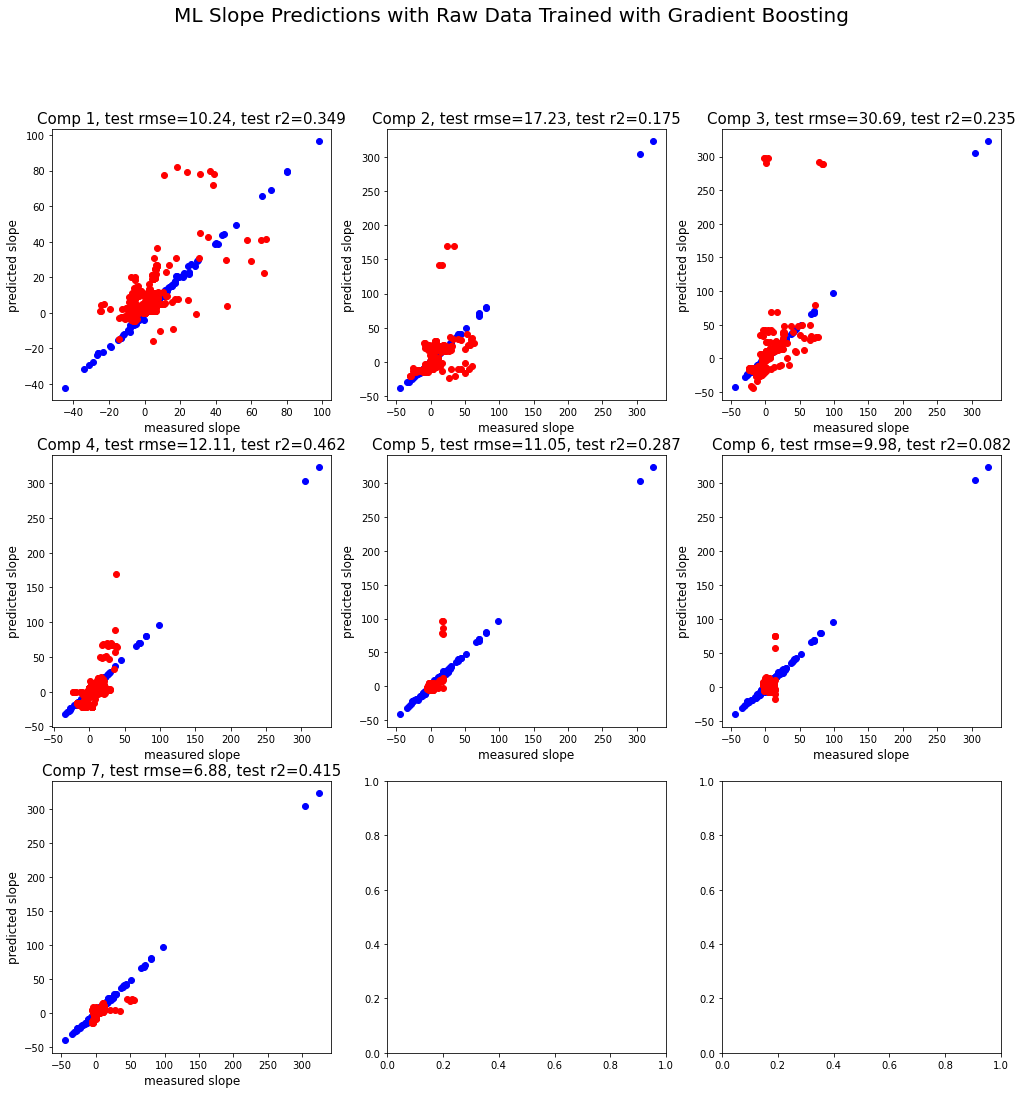

In [11]:
plot_ml_predictions(
    slope_ml_dict_from_raw_gb,
    'slope',
    'ML Slope Predictions with Raw Data Trained with Gradient Boosting'
)

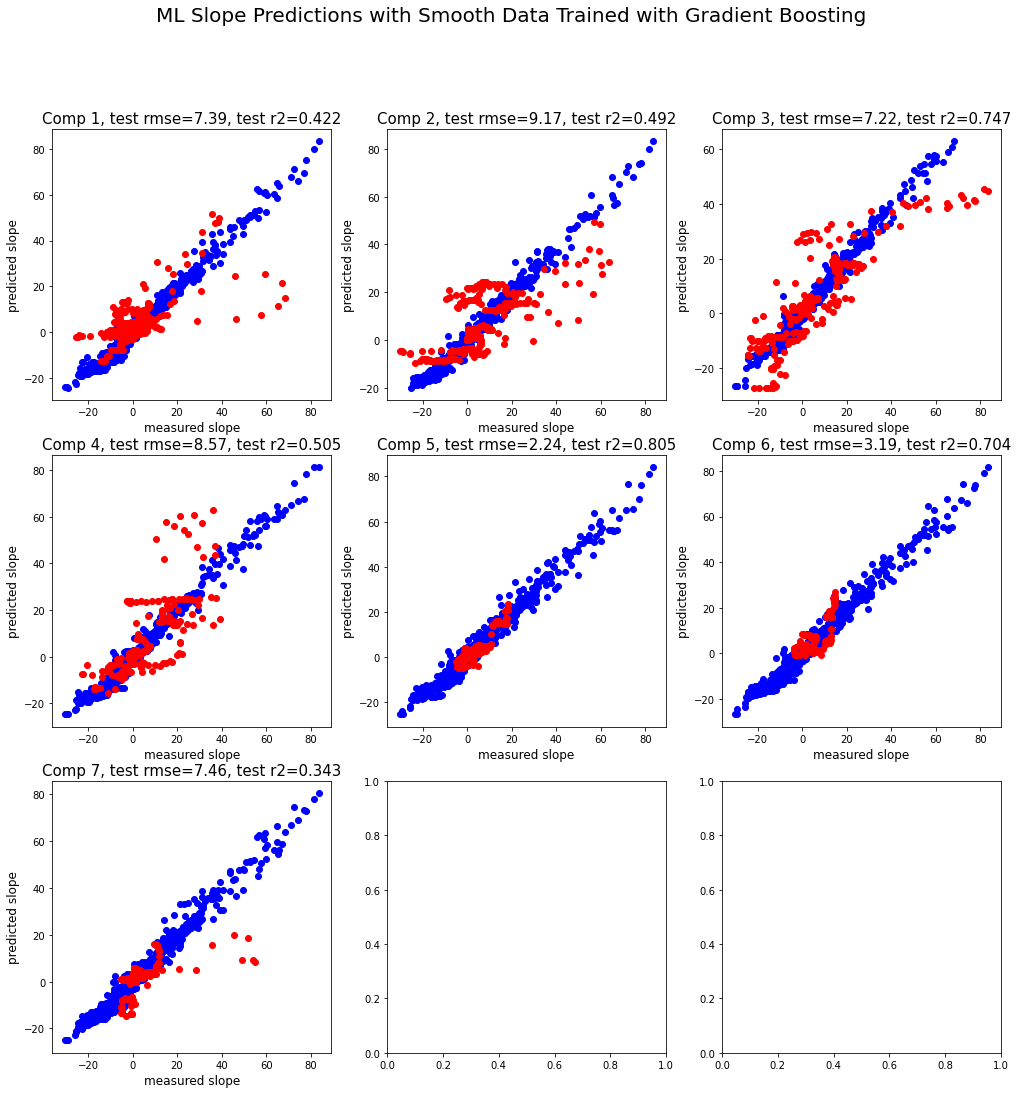

In [12]:
plot_ml_predictions(
    slope_ml_dict_from_smooth_gb,
    'slope',
    'ML Slope Predictions with Smooth Data Trained with Gradient Boosting'
)

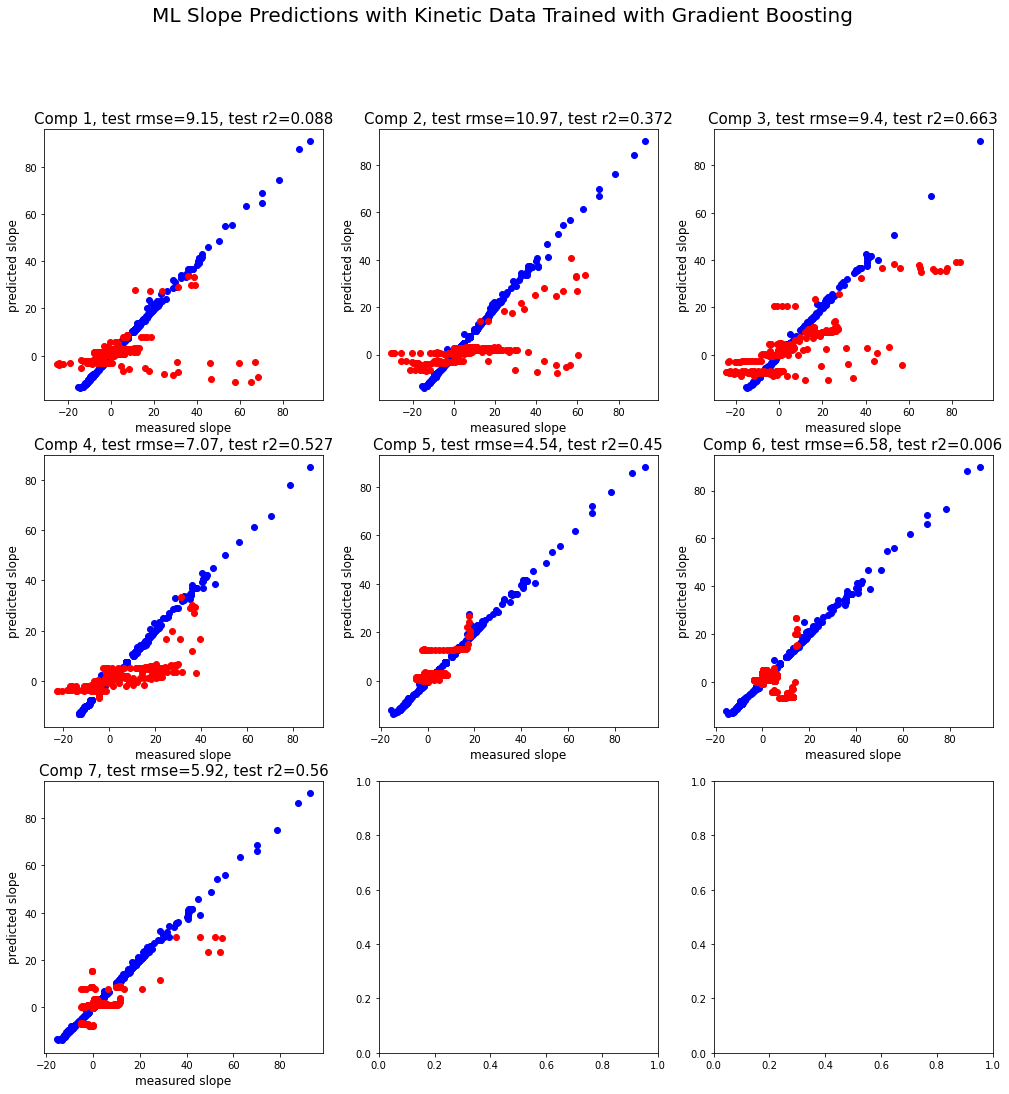

In [13]:
plot_ml_predictions(
    slope_ml_dict_from_kinetic_gb,
    'slope',
    'ML Slope Predictions with Kinetic Data Trained with Gradient Boosting'
)

In [30]:
import numpy as np

def get_ml_model_derivs(t, y, gas_comp, ml_model):

    dy = []
    for counter,conc in enumerate(y,0):
        if conc < 0:
            y[counter] = 0
    ml_input = np.concatenate((gas_comp,y)).reshape(1, -1)
    #print(ml_input)

    for slope in ml_model.predict(ml_input)[0]:
        if slope > 100:
            slope = 100
        if slope < -100:
            slope = 100
        dy.append(slope)
        
    # print(dy)
    return dy 

In [31]:
import pandas as pd
from scipy.integrate import solve_ivp 
# from ml_slope_model.get_ml_model_derivs import get_ml_model_derivs

def solve_diff_eqs_ml(initial_values, times, gas_comp, ml_model):
   
    t_range = [times[0],times[-1]]
    sol = solve_ivp(lambda t, y: get_ml_model_derivs(t, y, gas_comp, ml_model), t_range, initial_values,t_eval=times, method ='BDF')

    sim_data = pd.DataFrame(index = times, columns = ['acetate','biomass', 'butanol', 'butyrate', 'ethanol'])

    sim_data['acetate']  = sol.y[0]
    sim_data['biomass']  = sol.y[1]
    sim_data['butanol']  = sol.y[2]
    sim_data['butyrate'] = sol.y[3]
    sim_data['ethanol']  = sol.y[4]
    sim_data.clip(lower=0, inplace=True)

    return sim_data

In [40]:
import pandas as pd
from initial_value_problem.get_initial_values import get_initial_values
from initial_value_problem.get_time_values import get_time_values
from initial_value_problem.get_gas_comp import get_gas_comp
# from ml_slope_model.solve_diff_eqs_ml import solve_diff_eqs_ml

#smooth data is needed for data point/initial values
def get_ml_slope_time_course_data(slope_ml_dict, smooth_data):
  compositions = range(1,8)
  sim_df = pd.DataFrame()

  for comp in compositions:
    print(f'comp {comp}')
    comp_df = smooth_data.loc[comp]
    initial_values = get_initial_values(comp_df)
    times = get_time_values(comp_df)
    gas_comp = get_gas_comp()[comp]
    ml_model=slope_ml_dict[f'composition_{comp}']['model']

    sim_comp_df = solve_diff_eqs_ml(initial_values, times, gas_comp, ml_model)

    sim_comp_df.index.rename('time', inplace=True)
    sim_comp_df.reset_index(inplace=True, drop=False)
    sim_comp_df.insert(0, "composition", comp)

    sim_df =  pd.concat([sim_df , sim_comp_df],sort=True)

  sim_df.set_index(['composition','time'],drop=True,inplace=True) 

  

  return(sim_df)

In [41]:
# from ml_slope_model.get_ml_slope_time_course_data import get_ml_slope_time_course_data


# time_course_df_from_raw_rf = get_ml_slope_time_course_data(slope_ml_dict_from_raw_rf, smooth_data)
# time_course_df_from_smooth_rf = get_ml_slope_time_course_data(slope_ml_dict_from_smooth_rf, smooth_data)
# time_course_df_from_kinetic_rf = get_ml_slope_time_course_data(slope_ml_dict_from_kinetic_rf, smooth_data)
# time_course_df_from_raw_gb = get_ml_slope_time_course_data(slope_ml_dict_from_raw_gb, smooth_data)
time_course_df_from_smooth_gb = get_ml_slope_time_course_data(slope_ml_dict_from_smooth_gb, smooth_data)
# time_course_df_from_kinetic_gb = get_ml_slope_time_course_data(slope_ml_dict_from_kinetic_gb, smooth_data)

comp 1
comp 2
comp 3
comp 4
comp 5
comp 6
comp 7
comp 1
comp 2
comp 3
comp 4


KeyboardInterrupt: 

In [ ]:
from plotting.plot_fit import plot_fit
plot_fit(time_course_df_from_raw_rf, raw_data, 'ML Prediction with Slope from Raw with Random Forest')

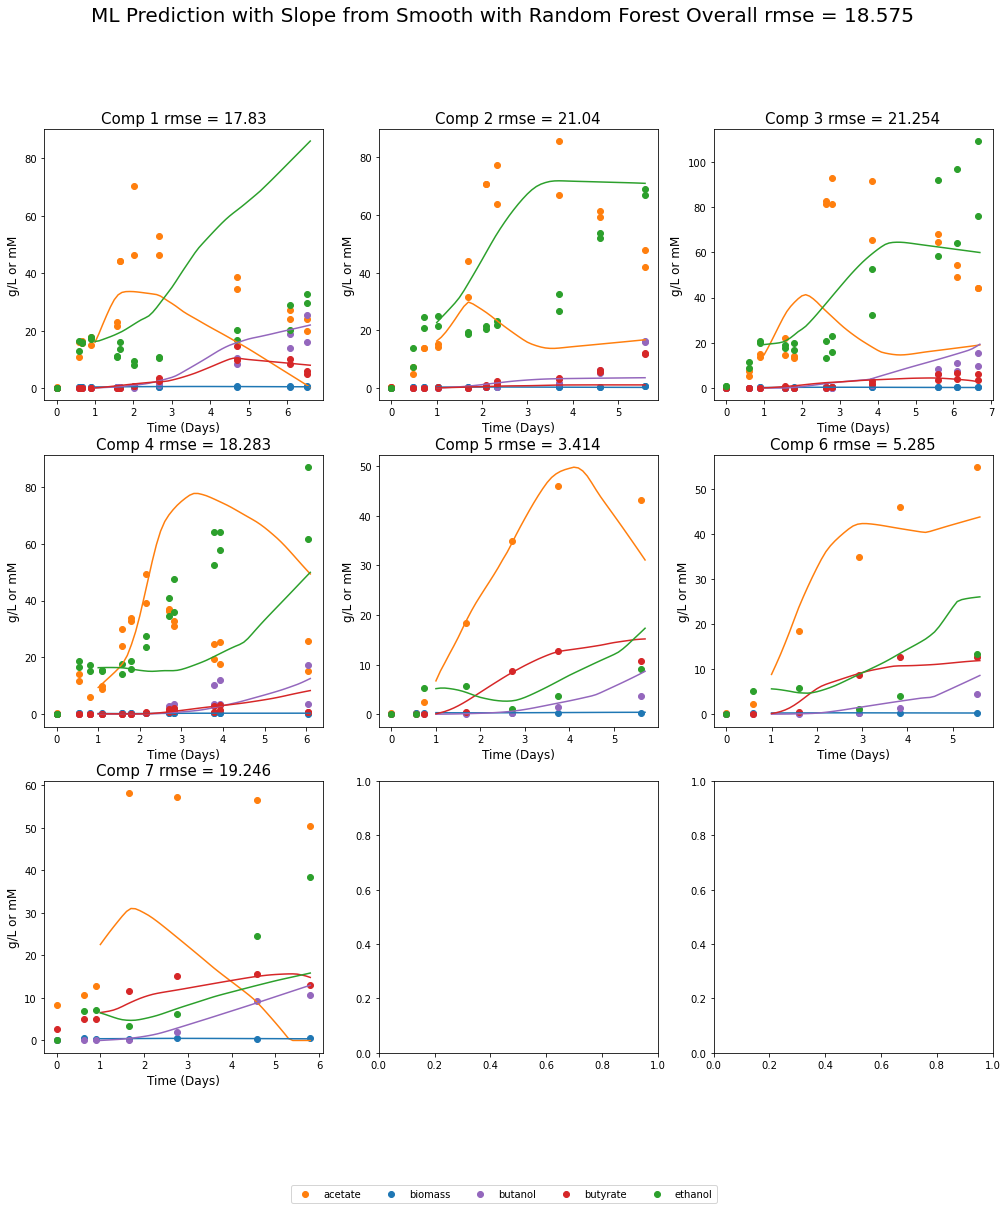

In [42]:
plot_fit(time_course_df_from_smooth_rf, raw_data, 'ML Prediction with Slope from Smooth with Random Forest')

In [ ]:
plot_fit(time_course_df_from_kinetic_rf, raw_data, 'ML Prediction with Slope from Kinetic with Random Forest')

In [ ]:
plot_fit(time_course_df_from_raw_gb, raw_data, 'ML Prediction with Slope from Raw with Gradient Boosting')

In [ ]:
plot_fit(time_course_df_from_smooth_gb, raw_data, 'ML Prediction with Slope from Smooth with Gradient Boosting')

In [ ]:
plot_fit(time_course_df_from_kinetic_gb, raw_data, 'ML Prediction with Slope from Kinetic with Gradient Boosting')